<a href="https://colab.research.google.com/github/sketchydough/Pytorch-DL-Practice/blob/main/boundingboxes_object_detection_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [15]:
# download the model
import urllib.request
import tarfile
import os

model_url = 'http://download.tensorflow.org/models/object_detection/ssd_mobilenet_v2_coco_2018_03_29.tar.gz'
urllib.request.urlretrieve(model_url, 'ssd_mobilenet_v2_coco.tar.gz')

# extract the model
with tarfile.open('ssd_mobilenet_v2_coco.tar.gz', 'r:gz') as tar:
    tar.extractall()

/tmp/ipython-input-1853109329.py:11: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  tar.extractall()


In [16]:
# loading the model
model = tf.saved_model.load('ssd_mobilenet_v2_coco_2018_03_29/saved_model')

In [17]:
# uploading image to colab
from google.colab import files
uploaded = files.upload()

Saving cars.jpg to cars (1).jpg


In [18]:
#Get the filename and load it
cars = list(uploaded.keys())[0]
print(f"Uploaded file: {cars}")

img = Image.open(cars)

image_np = np.array(img)

Uploaded file: cars (1).jpg


In [19]:
# run detection
input_tensor = tf.convert_to_tensor(image_np)
input_tensor = input_tensor[tf.newaxis, ...]
model_fn = model.signatures['serving_default']
output_dict = model_fn(input_tensor)

In [20]:
# bounding boxes, class labels and scores
boxes = output_dict['detection_boxes'][0].numpy()
class_ids = output_dict['detection_classes'][0].numpy().astype(int)
scores = output_dict['detection_scores'][0].numpy()

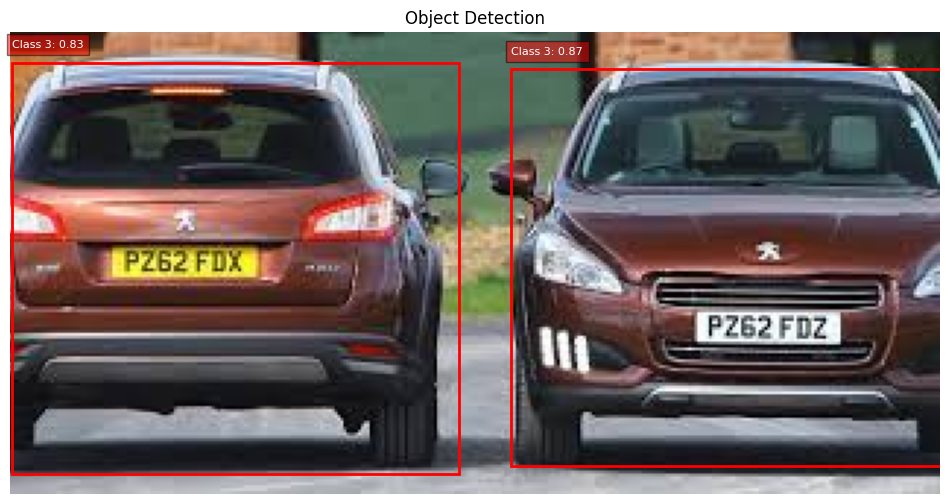

In [21]:
 #visualize
plt.figure(figsize=(12, 8))
plt.imshow(image_np)
plt.title("Object Detection")
plt.axis('off')

for i in range(len(boxes)):
    if scores[i] > 0.5:  # Only show detections with confidence > 50%
        box = boxes[i]
        # Box format is [ymin, xmin, ymax, xmax] in normalized coordinates
        ymin, xmin, ymax, xmax = box

        # Convert to pixel coordinates
        height, width = image_np.shape[:2]
        left = xmin * width
        top = ymin * height
        box_width = (xmax - xmin) * width
        box_height = (ymax - ymin) * height

        plt.gca().add_patch(plt.Rectangle(
            (left, top),
            box_width,
            box_height,
            linewidth=2,
            edgecolor='r',
            facecolor='none'
        ))

        # Add label with confidence score
        label = f"Class {class_ids[i]}: {scores[i]:.2f}"
        plt.text(left, top - 5, label,
                bbox=dict(facecolor='red', alpha=0.5),
                fontsize=8, color='white')

plt.show()